In [9]:
# Bibliotecas:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib as mpl

# Para Git:
import joblib
import os
import urllib

print('Matplot version : {}'.format(mpl.__version__))
print('Numpy version : {}'.format(np.__version__))
print('Pandas version : {}'.format(pd.__version__))
print('Sklearn version : {}'.format(sklearn.__version__))

DATA_ROOT ='https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/'
DATA_PATH = os.path.join('data', 'raw')
DATA_URL = DATA_ROOT + 'processed.cleveland.data' 

DATA_FILE = 'heart.csv'
DATA_DATA = os.path.join(DATA_PATH, DATA_FILE)



Matplot version : 3.1.3
Numpy version : 1.18.1
Pandas version : 1.0.1
Sklearn version : 0.22.1


# Análise Exploratória:

In [4]:
#data_df = pd.read_csv('/content/processed.cleveland.csv')
#dat_df = pd.DataFrame(data_df)

In [5]:
dat_df.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [6]:
dat_df.columns = ['idade', 'sexo', 'dor', 'pressão_sanguinea', 'colesterol', 'glicose',
             'ecg_em_repouso', 'freq_card_max', 'dor_causada_exer', 'oldpeak',
             'slope_peak_exercise', 'major_vessels', 'thal', 'diagnostico']

In [7]:
dat_df.head()

,idade,sexo,dor,pressão_sanguinea,colesterol,glicose,ecg_em_repouso,freq_card_max,dor_causada_exer,oldpeak,slope_peak_exercise,major_vessels,thal,diagnostico
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [8]:
dat_df.describe()

,idade,sexo,dor,pressão_sanguinea,colesterol,glicose,ecg_em_repouso,freq_card_max,dor_causada_exer,oldpeak,slope_peak_exercise,diagnostico
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [9]:
dat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   idade                302 non-null    float64
 1   sexo                 302 non-null    float64
 2   dor                  302 non-null    float64
 3   pressão_sanguinea    302 non-null    float64
 4   colesterol           302 non-null    float64
 5   glicose              302 non-null    float64
 6   ecg_em_repouso       302 non-null    float64
 7   freq_card_max        302 non-null    float64
 8   dor_causada_exer     302 non-null    float64
 9   oldpeak              302 non-null    float64
 10  slope_peak_exercise  302 non-null    float64
 11  major_vessels        302 non-null    object 
 12  thal                 302 non-null    object 
 13  diagnostico          302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [10]:
# Verificando dados ausentes:
ausentes = (dat_df[dat_df.columns] == '?').sum()
print(ausentes)

idade                  0
sexo                   0
dor                    0
pressão_sanguinea      0
colesterol             0
glicose                0
ecg_em_repouso         0
freq_card_max          0
dor_causada_exer       0
oldpeak                0
slope_peak_exercise    0
major_vessels          4
thal                   2
diagnostico            0
dtype: int64


# Tratamento dos Dados:

In [11]:
dat_df[dat_df.columns] = dat_df[dat_df.columns].replace('?', np.nan)
dat_df.dropna(axis = 0, inplace = True)

In [12]:
ausentes = (dat_df[dat_df.columns] == 'Nan').sum()
print(ausentes)

idade                  0
sexo                   0
dor                    0
pressão_sanguinea      0
colesterol             0
glicose                0
ecg_em_repouso         0
freq_card_max          0
dor_causada_exer       0
oldpeak                0
slope_peak_exercise    0
major_vessels          0
thal                   0
diagnostico            0
dtype: int64


In [13]:
dat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 300
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   idade                296 non-null    float64
 1   sexo                 296 non-null    float64
 2   dor                  296 non-null    float64
 3   pressão_sanguinea    296 non-null    float64
 4   colesterol           296 non-null    float64
 5   glicose              296 non-null    float64
 6   ecg_em_repouso       296 non-null    float64
 7   freq_card_max        296 non-null    float64
 8   dor_causada_exer     296 non-null    float64
 9   oldpeak              296 non-null    float64
 10  slope_peak_exercise  296 non-null    float64
 11  major_vessels        296 non-null    object 
 12  thal                 296 non-null    object 
 13  diagnostico          296 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.7+ KB


In [15]:
# Verificando os resultados possíveis para o diagnóstico:
dat_df['diagnostico'].unique()

array([2, 1, 0, 3, 4])

# Criação dos Clusters

### Agrupamento Hierarquico

In [58]:
#Biblioteca:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import normalize

# Duplicação do documento para utilizar no Dendograma:
dat_den = dat_df.copy()

# Variavel para normalização
dat_den_norm = normalize(dat_den)

In [57]:
dat_den.head()

,idade,sexo,dor,pressão_sanguinea,colesterol,glicose,ecg_em_repouso,freq_card_max,dor_causada_exer,oldpeak,slope_peak_exercise,major_vessels,thal,diagnostico
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


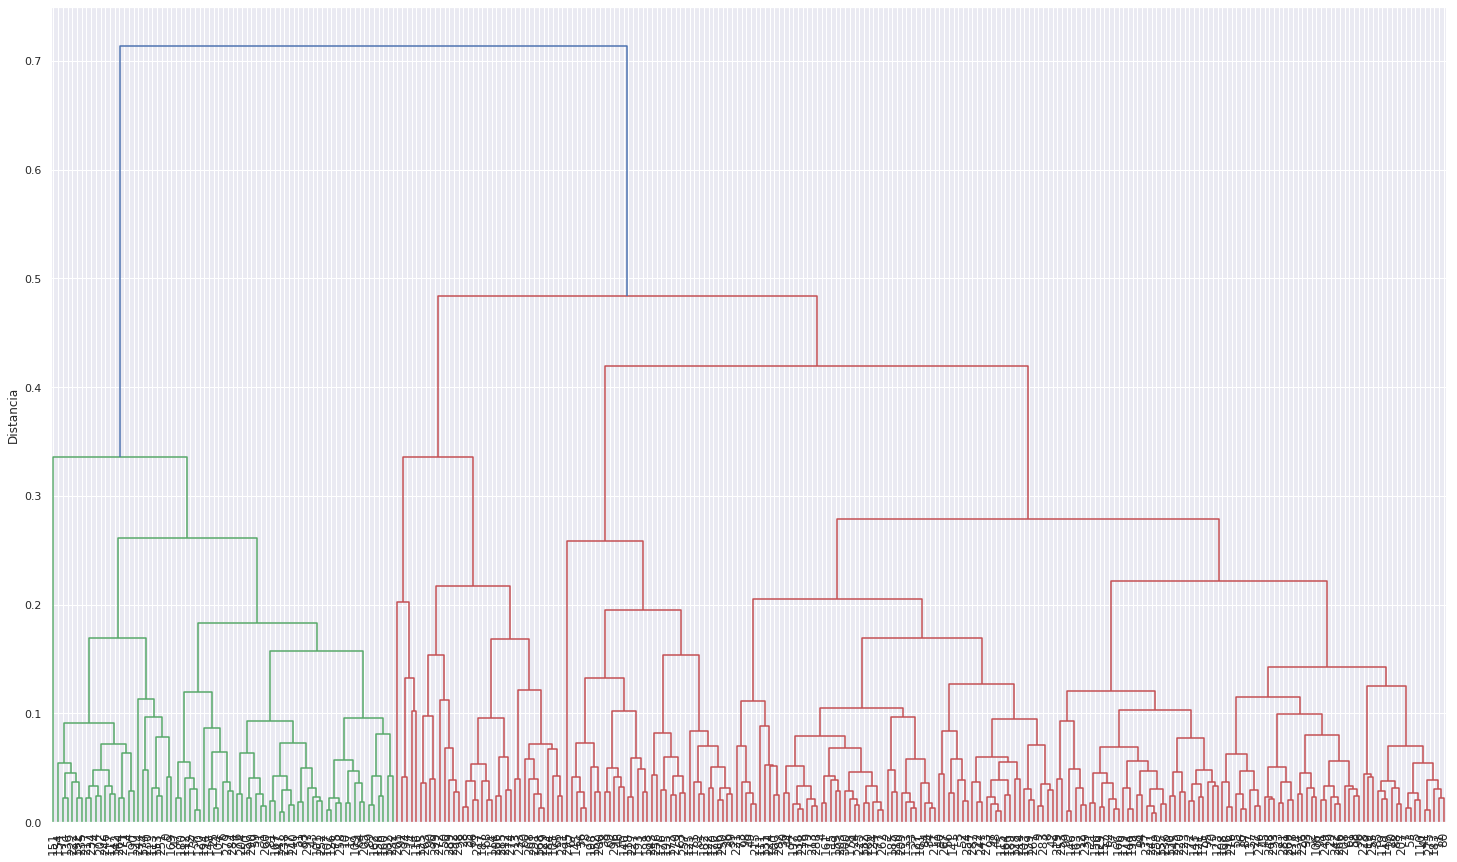

In [62]:
#Gráfico:
mesclagens = linkage(dat_den_norm, method='complete')
eixo_x = list(dat_den.index)
_ = fig, ax = plt.subplots(figsize=(25,15))
_ = dendrogram(mesclagens, leaf_font_size=12, labels=eixo_x, ax=ax)
_ = plt.xticks(rotation=90)
_ = ax.set_ylabel('Distancia')

### KMeans

In [63]:
#tranformar em matriz para podermos montar os gráficos:
dat = dat_df.iloc[:,:-1].values
dat_matriz = dat.copy()
dat

array([[67.0, 1.0, 4.0, ..., 2.0, '3.0', '3.0'],
       [67.0, 1.0, 4.0, ..., 2.0, '2.0', '7.0'],
       [37.0, 1.0, 3.0, ..., 3.0, '0.0', '3.0'],
       ...,
       [68.0, 1.0, 4.0, ..., 2.0, '2.0', '7.0'],
       [57.0, 1.0, 4.0, ..., 2.0, '1.0', '7.0'],
       [57.0, 0.0, 2.0, ..., 2.0, '1.0', '3.0']], dtype=object)

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42, init='k-means++')
y_kmeans = kmeans.fit_predict(dat)

In [32]:
y_kmeans

array([0, 0, 1, 3, 1, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 1, 1, 0, 1, 3, 2, 2,
       1, 3, 1, 2, 0, 1, 3, 1, 1, 2, 1, 1, 1, 3, 0, 2, 0, 0, 3, 2, 3, 2,
       1, 3, 0, 4, 3, 3, 3, 2, 1, 0, 0, 1, 3, 1, 3, 2, 3, 3, 2, 3, 2, 3,
       1, 2, 1, 0, 1, 0, 1, 3, 2, 0, 2, 1, 0, 3, 0, 2, 0, 2, 1, 1, 1, 1,
       2, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 2, 0, 3, 2, 3, 1, 0, 3, 2, 1,
       3, 2, 0, 3, 3, 3, 2, 0, 1, 4, 1, 0, 2, 1, 0, 0, 1, 3, 1, 1, 1, 1,
       3, 1, 3, 0, 3, 1, 1, 2, 3, 2, 1, 1, 0, 1, 2, 2, 2, 0, 4, 2, 0, 2,
       2, 2, 2, 2, 3, 2, 3, 0, 1, 3, 2, 2, 3, 0, 0, 0, 4, 3, 0, 1, 3, 2,
       1, 1, 4, 1, 0, 2, 3, 1, 0, 2, 0, 3, 2, 0, 3, 2, 0, 1, 1, 0, 1, 2,
       3, 2, 3, 2, 0, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 2, 1, 1, 1, 3, 0,
       1, 1, 3, 2, 3, 3, 3, 2, 3, 0, 3, 0, 0, 1, 1, 2, 1, 2, 1, 1, 3, 0,
       1, 0, 3, 3, 3, 0, 0, 2, 2, 3, 1, 3, 0, 0, 1, 2, 1, 1, 3, 2, 3, 1,
       3, 3, 0, 2, 3, 3, 1, 2, 1, 1, 3, 2, 1, 3, 3, 3, 2, 1, 1, 1, 3, 2,
       3, 3, 3, 3, 3, 0, 0, 3, 3, 1], dtype=int32)

In [33]:
# contagem:
from collections import Counter

Counter(kmeans.labels_)

Counter({0: 53, 1: 93, 2: 61, 3: 84, 4: 5})

In [34]:
y_kmeans is kmeans.labels_

## as labels foram preservadas

True

In [35]:
centroids = kmeans.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 4]

In [1]:
sns.set()
plt.figure(figsize=(20,15))

_ = plt.scatter(centroids_x, centroids_y, c='black', marker='x', s=100)

plt.scatter(dat[y_kmeans == 0, 0], dat[y_kmeans == 0, 4], s = 50, c = 'magenta', alpha=0.8)
plt.scatter(dat[y_kmeans == 1, 0], dat[y_kmeans == 1, 4], s = 50, c = 'orange', alpha=0.3)
plt.scatter(dat[y_kmeans == 2, 0], dat[y_kmeans == 2, 4], s = 50, c = 'purple', alpha=0.5)
plt.scatter(dat[y_kmeans == 3, 0], dat[y_kmeans == 3, 4], s = 50, c = 'blue', alpha=0.5)
plt.scatter(dat[y_kmeans == 4, 0], dat[y_kmeans == 4, 4], s = 50, c = 'red', alpha=0.5)
plt.title('Probabilidade de desenvolvimento de doenças cardíacas', fontsize=16)
plt.xlabel('Idade', fontsize=10)
plt.ylabel('Colesterol', fontsize=10)
plt.show()


NameError: name 'sns' is not defined

In [44]:
# Comparação:

df = pd.DataFrame({'Grupos': y_kmeans, 'diagnostico': dat_df['diagnostico']})
ct = pd.crosstab(df['Grupos'], df['diagnostico'])
print(ct)

diagnostico   0   1   2   3  4
Grupos                        
0            15  14  10  11  3
1            63  15   6   7  2
2            29  13  10   6  3
3            49  12   8  11  4
4             3   0   1   0  1


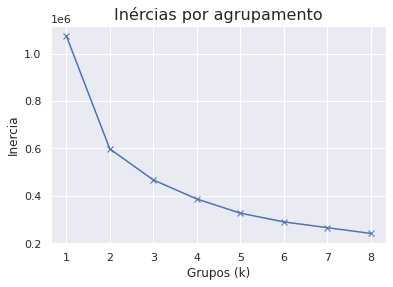

In [49]:
ks = range(1, 9)
inercias = []

for k in ks:
    modelo = KMeans(n_clusters=k)
    modelo.fit(dat)
    inercias.append(modelo.inertia_)

_ = plt.plot(ks, inercias, 'x-')
_ = plt.title('Inércias por agrupamento', fontsize=15)
_ = plt.xlabel('Grupos (k)')
_ = plt.ylabel('Inercia')
_ = plt.xticks(ks)

In [53]:
#Análise da silhueta dos clusters do KMeans
#Biblioteca:
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(dat) for k in range(1, 10)]
silhouette_scores = [silhouette_score(dat, modelo.labels_) for modelo in kmeans_per_k[1:]]

silhouette_scores

[0.3855571899577006,
 0.2835256449341491,
 0.28004212148554514,
 0.2804901934812346,
 0.2476726113737105,
 0.2543732378446095,
 0.24770803614920317,
 0.2594265828459429]

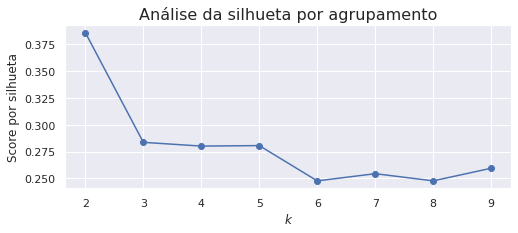

In [54]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.title('Análise da silhueta por agrupamento', fontsize=16)
plt.xlabel("$k$")
plt.ylabel("Score por silhueta")
plt.show()

### DBSCAN


In [65]:
#Biblioteca:
from sklearn.cluster import DBSCAN

#Variáveis:
dbscan = DBSCAN(eps=20, min_samples=4)
clusters = dbscan.fit_predict(dat_matriz)
clusters

array([ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  1,  2, -1,  0,  0,  0, -1,  0,  0,  0,  1,  0,  4,  0,  0,  0,
        0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0, -1,
        0,  0,  0,  3,  0,  0, -1,  0,  0,  0,  2,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  3,  0,  0,  0, -1,  0,  0,
        4,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  3,
        0,  0,  0, -1,  0,  0,  0,  0,  2,  0,  0,  0,  0,  3, -1,  0, -1,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0, -1,
        4,  0, -1,  0,  1,  0,  0,  0,  4,  0, -1, -1,  0,  0,  0, -1,  0,
        0,  0,  3,  0, -1,  0,  0,  0,  2,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,
        0,  0,  0,  0,  0

No handles with labels found to put in legend.


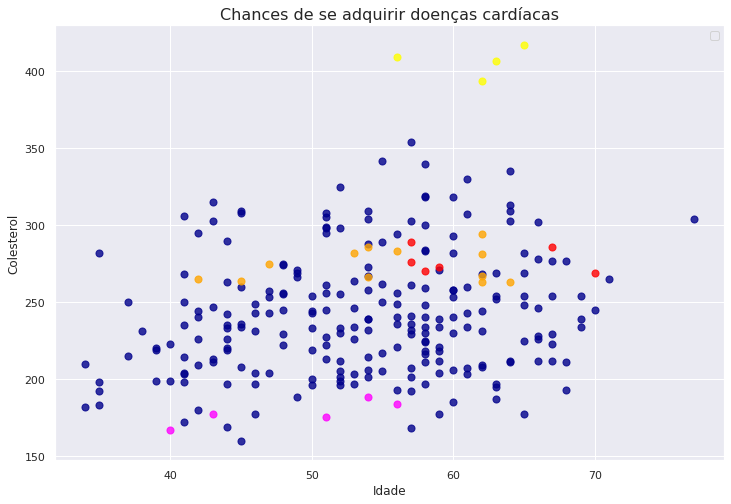

In [71]:
sns.set()
plt.figure(figsize=(20, 15))

plt.scatter(dat_matriz[clusters == 0, 0], dat_matriz[clusters == 0, 4], s = 50, c = 'darkBlue', alpha=0.8)
plt.scatter(dat_matriz[clusters == 1, 0], dat_matriz[clusters == 1, 4], s = 50, c = 'magenta', alpha=0.8)
plt.scatter(dat_matriz[clusters == 2, 0], dat_matriz[clusters == 2, 4], s = 50, c = 'red', alpha=0.8)
plt.scatter(dat_matriz[clusters == 3, 0], dat_matriz[clusters == 3, 4], s = 50, c = 'orange', alpha=0.8)
plt.scatter(dat_matriz[clusters == 4, 0], dat_matriz[clusters == 4, 4], s = 50, c = 'yellow', alpha=0.8)

plt.title('Probabilidade de desenvolvimento de doenças cardíacas', fontsize=15)
plt.xlabel('Idade', fontsize=10)
plt.ylabel('Colesterol', fontsize=10)
plt.show()